In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import scipy as stats
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/KarinkiManikanta/Data-Sets-For-Machine-Learnig-and-Data-Science/master/DataSets/Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.ndim

2

In [6]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
pandas_profiling.ProfileReport(data)

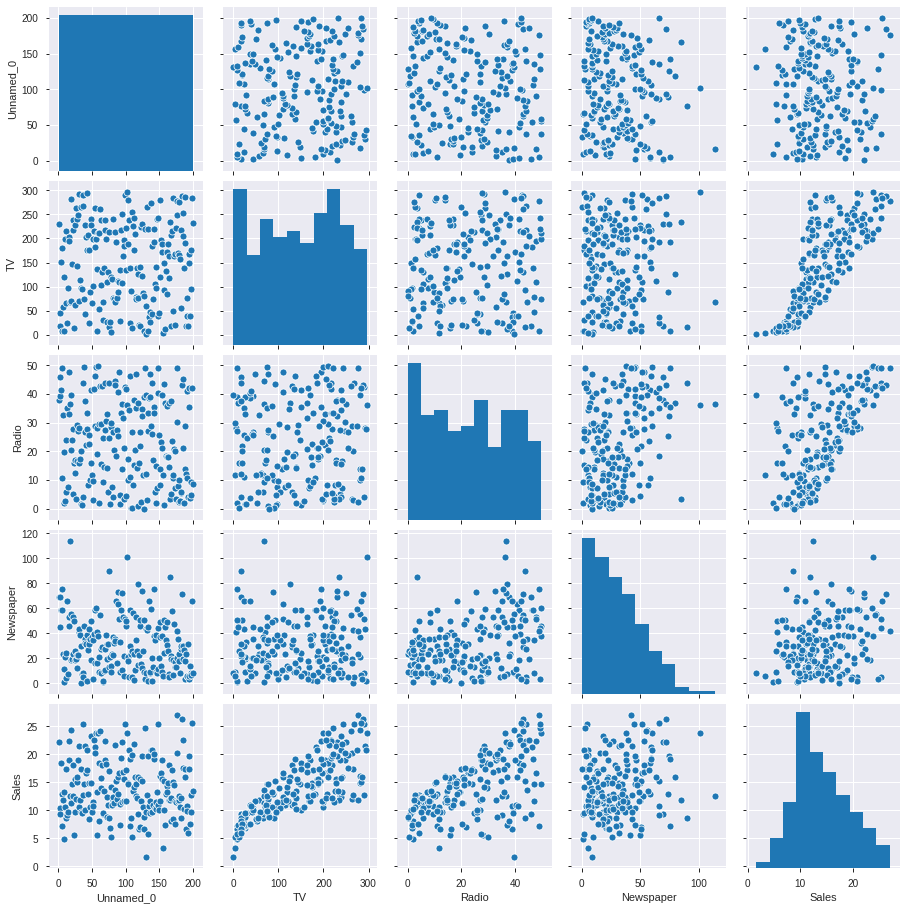

In [10]:
sns.pairplot(data)

In [11]:
data.isna().sum()

Unnamed_0    0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
data.columns

Index(['Unnamed_0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
data1=data.drop('Unnamed_0',axis=1)

In [14]:
data1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
x_data=data1[['TV','Radio','Newspaper']]
x_data

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y_data=data1['Sales']

In [17]:
y_data

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [18]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(x_data,y_data,test_size=0.20,random_state=10)

In [19]:
lr=LinearRegression()

In [20]:
X_traine.shape

(160, 3)

In [21]:
X_test.shape

(40, 3)

In [22]:
Y_traine.shape

(160,)

In [23]:
Y_test.shape

(40,)

In [24]:
lr.fit(X_traine,Y_traine)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
train_score=lr.score(X_traine,Y_traine)
train_score

0.9209087553499528

In [26]:
test_score=lr.score(X_test,Y_test)
test_score

0.8353672324670594

In [27]:
adv_predic=lr.predict(X_test)
adv_predic


array([18.1625299 , 12.92663232, 18.0531098 , 23.64464668, 20.70438374,
       14.28227997, 14.94493548, 21.38232981, 21.17508238, 12.73110461,
       24.00312134,  7.21544071, 12.24762152, 19.24345998, 19.38241854,
       13.45643798, 19.6247089 ,  9.2531648 , 21.13268075, 20.90762408,
       15.53485445, 10.92529369, 22.82955184, 15.8122438 , 17.42515749,
        8.16218669, 11.89783444, 12.70337575, 21.74138085,  7.96215368,
       12.50099965, 20.45535282,  4.72120047,  4.72259288, 16.75292333,
       15.75804986,  6.74415499, 17.73477354,  9.01591827, 13.617599  ])

In [28]:
pd.DataFrame({'variable':adv_predic,'estimate':Y_test})

,variable,estimate
59,18.162530,18.4
5,12.926632,7.2
20,18.053110,18.0
198,23.644647,25.5
52,20.704384,22.6
19,14.282280,14.6
162,14.944935,14.9
55,21.382330,23.7
69,21.175082,22.3
2,12.731105,9.3


In [29]:
#initialize
ridge_reg=Ridge(alpha=0)
ridge_reg.fit(X_traine,Y_traine)
ridge_df=pd.DataFrame({'variable':adv_predic,'estimate':Y_test})
ridge_df

,variable,estimate
59,18.162530,18.4
5,12.926632,7.2
20,18.053110,18.0
198,23.644647,25.5
52,20.704384,22.6
19,14.282280,14.6
162,14.944935,14.9
55,21.382330,23.7
69,21.175082,22.3
2,12.731105,9.3


In [30]:
ridge_traine_pred=[]
ridge_test_pred=[]
alphas=np.arange(0,100,1)

for alpha in alphas:
    ridge_reg=Ridge(alpha=alpha)
    ridge_reg.fit(X_traine,Y_traine)
    var_name='estimation'+str(alpha)
    ridge_df[var_name]=Y_test
    
    #prediction
    ridge_traine_pred.append(ridge_reg.predict(X_traine))
    ridge_test_pred.append(ridge_reg.predict(X_test))
ridge_df=ridge_df.set_index('variable').T.rename_axis('estimation')
ridge_df

variable,18.162530,12.926632,18.053110,23.644647,20.704384,14.282280,14.944935,21.382330,21.175082,12.731105,...,12.501000,20.455353,4.721200,4.722593,16.752923,15.758050,6.744155,17.734774,9.015918,13.617599
estimation,,,,,,,,,,,,,,,,,,,,,
estimate,18.4,7.2,18.0,25.5,22.6,14.6,14.9,23.7,22.3,9.3,...,12.9,21.5,6.9,7.3,12.8,11.8,8.8,15.0,10.6,11.5
estimation0,18.4,7.2,18.0,25.5,22.6,14.6,14.9,23.7,22.3,9.3,...,12.9,21.5,6.9,7.3,12.8,11.8,8.8,15.0,10.6,11.5
estimation1,18.4,7.2,18.0,25.5,22.6,14.6,14.9,23.7,22.3,9.3,...,12.9,21.5,6.9,7.3,12.8,11.8,8.8,15.0,10.6,11.5
estimation2,18.4,7.2,18.0,25.5,22.6,14.6,14.9,23.7,22.3,9.3,...,12.9,21.5,6.9,7.3,12.8,11.8,8.8,15.0,10.6,11.5
estimation3,18.4,7.2,18.0,25.5,22.6,14.6,14.9,23.7,22.3,9.3,...,12.9,21.5,6.9,7.3,12.8,11.8,8.8,15.0,10.6,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
estimation95,18.4,7.2,18.0,25.5,22.6,14.6,14.9,23.7,22.3,9.3,...,12.9,21.5,6.9,7.3,12.8,11.8,8.8,15.0,10.6,11.5
estimation96,18.4,7.2,18.0,25.5,22.6,14.6,14.9,23.7,22.3,9.3,...,12.9,21.5,6.9,7.3,12.8,11.8,8.8,15.0,10.6,11.5
estimation97,18.4,7.2,18.0,25.5,22.6,14.6,14.9,23.7,22.3,9.3,...,12.9,21.5,6.9,7.3,12.8,11.8,8.8,15.0,10.6,11.5


In [31]:
x_data.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

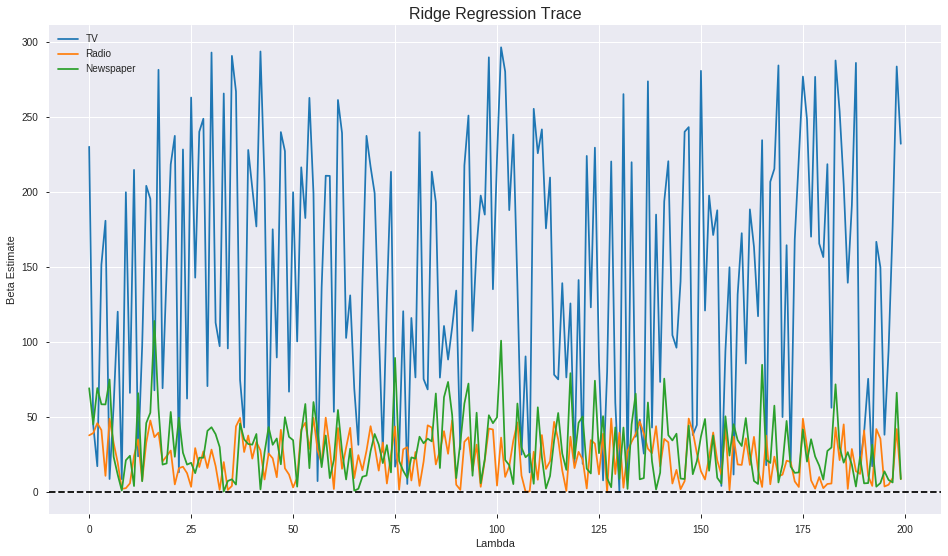

In [33]:
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(x_data)
ax.axhline(y=0,color='black',linestyle='--')
ax.set_xlabel('Lambda')
ax.set_ylabel('Beta Estimate')
ax.set_title('Ridge Regression Trace',fontsize=16)
ax.legend(labels=['TV','Radio','Newspaper'])
ax.grid(True)